In [61]:
 pip install --upgrade jupyterlab-git

Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [63]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\slrob\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
data_file = pd.read_csv(path+"/StudentsPerformance.csv")
data_file

,gender,student number,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,1,group B,bachelor's degree,standard,none,72,72,74
1,female,2,group C,some college,standard,completed,69,90,88
2,female,3,group B,master's degree,standard,none,90,95,93
3,male,4,group A,associate's degree,free/reduced,none,47,57,44
4,male,5,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,996,group E,master's degree,standard,completed,88,99,95
996,male,997,group C,high school,free/reduced,none,62,55,55
997,female,998,group C,high school,free/reduced,completed,59,71,65
998,female,999,group D,some college,standard,completed,68,78,77


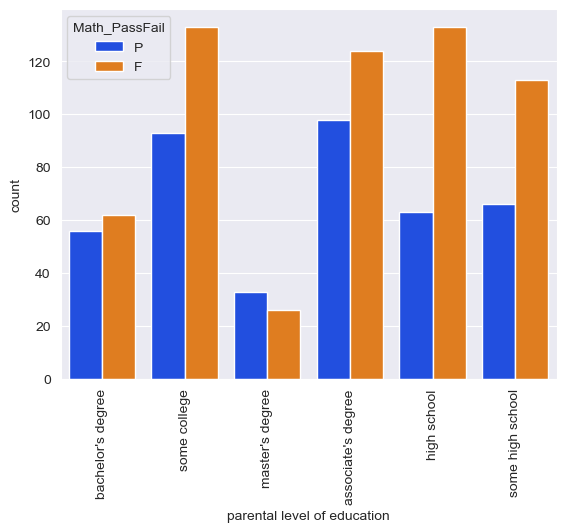

In [65]:
passmark=70
data_file["Math_PassFail"]=np.where(data_file["math score"]<passmark,"F","P")
#We call this column we add "take the math score" for us.
#Let values be False and Positive if greater.
data_file.Math_PassFail.value_counts()

#plot of success in math relative to their parents' education
p=sns.countplot(x="parental level of education",hue="Math_PassFail",data=data_file,palette="bright")
plt.xticks(rotation=90)
plt.show()

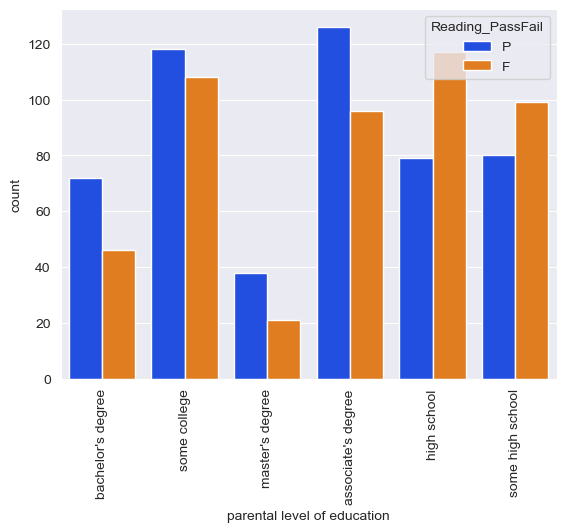

In [66]:
data_file["Reading_PassFail"]=np.where(data_file["reading score"]<passmark,"F","P")
#We call this column we add "take the math score" for us.
#Let values be False and Positive if greater.
data_file.Reading_PassFail.value_counts()

#plot of success in reading relative to their parents' education
p=sns.countplot(x="parental level of education",hue="Reading_PassFail",data=data_file,palette="bright")
plt.xticks(rotation=90)
plt.show()

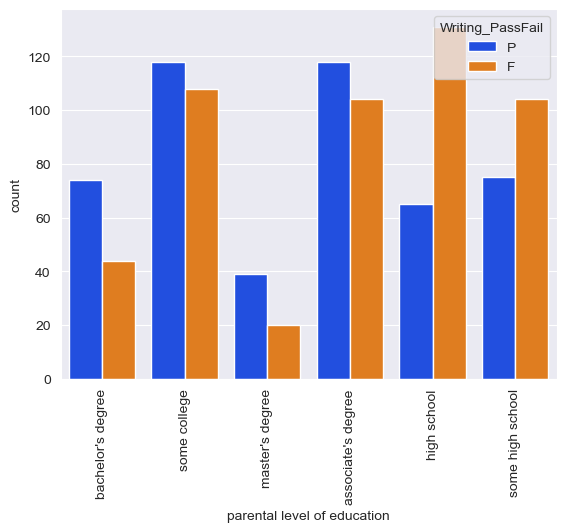

In [67]:
data_file["Writing_PassFail"]=np.where(data_file["writing score"]<passmark,"F","P")
#We call this column we add "take the math score" for us.
#Let values be False and Positive if greater.
data_file.Writing_PassFail.value_counts()

#plot of success in writing relative to their parents' education
p=sns.countplot(x="parental level of education",hue="Writing_PassFail",data=data_file,palette="bright")
plt.xticks(rotation=90)
plt.show()

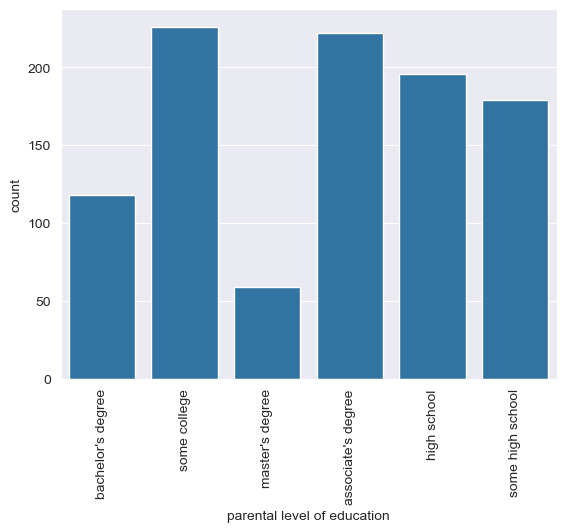

In [68]:
p=sns.countplot(x="parental level of education",data=data_file)
plt.xticks(rotation=90)
plt.show()

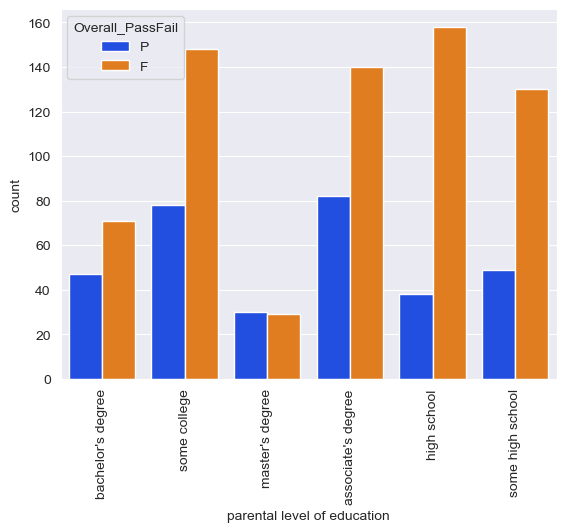

In [69]:
data_file["Overall_PassFail"] = data_file.apply(lambda x: "F" if x["Math_PassFail"]== 'F' 
                                     or x["Reading_PassFail"]== 'F' or x["Writing_PassFail"]== 'F'
                                    else 'P' , axis =1)
p=sns.countplot(x="parental level of education",hue="Overall_PassFail",data=data_file,palette="bright") 
# we compare it to hue
plt.xticks(rotation=90)
plt.show()

In [70]:
data_file.Overall_PassFail.value_counts()

Overall_PassFail
F    676
P    324
Name: count, dtype: int64

In [86]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
target_encoder = preprocessing.TargetEncoder()
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   student number               1000 non-null   int64 
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test preparation course      1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
 9   Math_PassFail                1000 non-null   object
 10  Reading_PassFail             1000 non-null   object
 11  Writing_PassFail             1000 non-null   object
 12  Overall_PassFail             1000 non-null   object
dtypes: int64(4), object(9)
memory usag

In [170]:
data_file

,gender,student number,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassFail,Reading_PassFail,Writing_PassFail,Overall_PassFail
0,female,1,group B,bachelor's degree,standard,none,72.0,72.0,74.0,P,P,P,P
1,female,2,group C,some college,standard,completed,69.0,90.0,88.0,F,P,P,F
2,female,3,group B,master's degree,standard,none,90.0,95.0,93.0,P,P,P,P
3,male,4,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,F,F,F,F
4,male,5,group C,some college,standard,none,76.0,78.0,75.0,P,P,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,996,group E,master's degree,standard,completed,88.0,99.0,95.0,P,P,P,P
996,male,997,group C,high school,free/reduced,none,62.0,55.0,55.0,F,F,F,F
997,female,998,group C,high school,free/reduced,completed,59.0,71.0,65.0,F,P,F,F
998,female,999,group D,some college,standard,completed,68.0,78.0,77.0,F,P,P,F


In [80]:
for col in categorical_cols:
    print(f'unique set for column {col} is: {data_file[col].unique()}')

unique set for column gender is: ['female' 'male']
unique set for column race/ethnicity is: ['group B' 'group C' 'group A' 'group D' 'group E']
unique set for column parental level of education is: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique set for column lunch is: ['standard' 'free/reduced']
unique set for column test preparation course is: ['none' 'completed']
unique set for column Math_PassFail is: ['P' 'F']
unique set for column Reading_PassFail is: ['P' 'F']
unique set for column Writing_PassFail is: ['P' 'F']
unique set for column Overall_PassFail is: ['P' 'F']


In [82]:
CorrelationData=data_file[['math score','reading score','writing score']].corr()
CorrelationData

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [208]:

#df_encoded.drop(['Writing_PassFail'],axis=1, inplace=True)
df_encoded = pd.get_dummies(data_file, columns=categorical_features)
#df_encoded.drop(['Math_PassFail','Reading_PassFail','Writing_PassFail','Overall_PassFail'],axis=1,inplace=True)
df_encoded

KeyError: "None of [Index(['gender_male', 'test preparation course_none', 'lunch_standard'], dtype='object')] are in the [columns]"

In [210]:
from sklearn.model_selection import train_test_split

#df_encoded.drop(['Math_PassFail','Reading_PassFail','Overall_PassFail'],axis=1, inplace=True)
#df_encoded = pd.get_dummies(data_file, columns=categorical_features, drop_first=True)

#df_encoded['math score'] = df_encoded['math score'].astype(float)
#df_encoded['reading score'] = df_encoded['reading score'].astype(float)
#df_encoded['writing score'] = df_encoded['writing score'].astype(float)
X = df_encoded[['gender_male','test preparation course_none','lunch_standard','parental level of education_high school','parental level of education_some college','parental level of education_master\'s degree','parental level of education_some high school']]
y = df_encoded['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#for col in ['gender', 'test preparation course', 'lunch']:
#data_file[col] = target_encoder.fit_transform(data_file[col])
#data_file
X_train
#y_train

,gender_male,test preparation course_none,lunch_standard,parental level of education_high school,parental level of education_some college,parental level of education_master's degree,parental level of education_some high school
29,False,True,True,False,False,True,False
535,False,False,False,False,False,False,False
695,False,True,False,False,True,False,False
557,True,True,False,False,False,True,False
836,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...
106,False,True,True,False,False,True,False
270,True,True,True,False,False,False,False
860,False,True,True,False,False,False,False
435,True,False,False,False,True,False,False


In [212]:
y_train

29     62.0
535    66.0
695    79.0
557    61.0
836    73.0
       ... 
106    87.0
270    69.0
860    53.0
435    50.0
102    85.0
Name: math score, Length: 800, dtype: float64

In [214]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # or any classifier of choice
from sklearn.ensemble import RandomForestRegressor

categorical_features = ['gender_male', 'test preparation course_none', 'lunch_standard']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
model.fit(X_train, y_train)

# Evaluate
score = model.score(X_test, y_test)
print(f'Validation Accuracy: {score}')


Validation Accuracy: 0.03


In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define Keras model for regression
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='tanh'),
    Dense(32, activation='softmax'),
    Dense(1)  # Single output for regression
])

# Compile the model with mean squared error loss for regression
#model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test,y_test)
print(f'Accuracy {accuracy}')

Epoch 1/10
25/25 [==============================] - 2s 19ms/step - loss: 1025.7012 - mae: 66.5482 - val_loss: 994.2922 - val_mae: 64.5112
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 1025.7013 - mae: 66.5482 - val_loss: 994.2922 - val_mae: 64.5112
Epoch 3/10
25/25 [==============================] - 0s 6ms/step - loss: 1025.7013 - mae: 66.5482 - val_loss: 994.2922 - val_mae: 64.5112
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 1025.7013 - mae: 66.5482 - val_loss: 994.2922 - val_mae: 64.5112
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 1025.7012 - mae: 66.5482 - val_loss: 994.2922 - val_mae: 64.5112
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 1025.7013 - mae: 66.5482 - val_loss: 994.2922 - val_mae: 64.5112
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 1025.7013 - mae: 66.5482 - val_loss: 994.2922 - val_mae: 64.5112
Epoch 8/10
25/25 [======================